### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### Checking GPU

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

### Data Collection

In [4]:
train_dir = r"C:\Users\US593\Work\Datasets\Casting_Data\train"
train_gen = ImageDataGenerator(rescale = 1/255)
data_train = train_gen.flow_from_directory(train_dir,target_size = (256,256),batch_size = 32, class_mode = "binary")

Found 6129 images belonging to 2 classes.


In [5]:
val_dir = r"C:\Users\US593\Work\Datasets\Casting_Data\val"
val_gen = ImageDataGenerator(rescale = 1/255)
data_val = val_gen.flow_from_directory(val_dir,target_size = (256,256),batch_size = 32, class_mode = "binary")

Found 504 images belonging to 2 classes.


In [6]:
test_dir = r"C:\Users\US593\Work\Datasets\Casting_Data\test"
test_gen = ImageDataGenerator(rescale = 1/255)
data_test = test_gen.flow_from_directory(test_dir,target_size = (256,256),batch_size = 32, class_mode = "binary")

Found 715 images belonging to 2 classes.


### Data Visualization

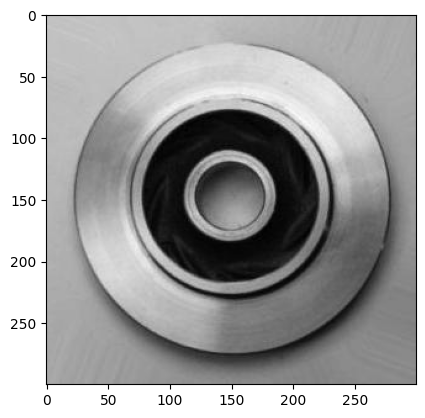

In [7]:
# ok
img = cv2.imread('ok.jpeg')
plt.imshow(img)

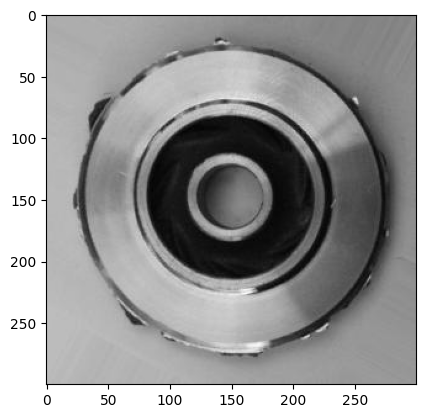

In [8]:
# defective
img = cv2.imread('defective.jpeg')
plt.imshow(img)

### Building CNN Model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape = (256,256,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [11]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

### Model Training

In [13]:
history = model.fit(data_train, validation_data=data_val, epochs=10, callbacks=[early_stopping],verbose=2)

Epoch 1/10
192/192 - 29s - loss: 0.5836 - accuracy: 0.6755 - val_loss: 0.2739 - val_accuracy: 0.8829 - 29s/epoch - 152ms/step
Epoch 2/10
192/192 - 22s - loss: 0.2368 - accuracy: 0.9021 - val_loss: 0.1581 - val_accuracy: 0.9444 - 22s/epoch - 112ms/step
Epoch 3/10
192/192 - 22s - loss: 0.1578 - accuracy: 0.9378 - val_loss: 0.1346 - val_accuracy: 0.9583 - 22s/epoch - 114ms/step
Epoch 4/10
192/192 - 22s - loss: 0.0865 - accuracy: 0.9695 - val_loss: 0.0571 - val_accuracy: 0.9722 - 22s/epoch - 113ms/step
Epoch 5/10
192/192 - 22s - loss: 0.0474 - accuracy: 0.9837 - val_loss: 0.0372 - val_accuracy: 0.9901 - 22s/epoch - 113ms/step
Epoch 6/10
192/192 - 22s - loss: 0.0466 - accuracy: 0.9853 - val_loss: 0.0437 - val_accuracy: 0.9881 - 22s/epoch - 114ms/step
Epoch 7/10
192/192 - 21s - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0262 - val_accuracy: 0.9921 - 21s/epoch - 112ms/step
Epoch 8/10
192/192 - 21s - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0176 - val_accuracy: 0.9980 - 21s/epoch - 111

### Model Evaluation

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

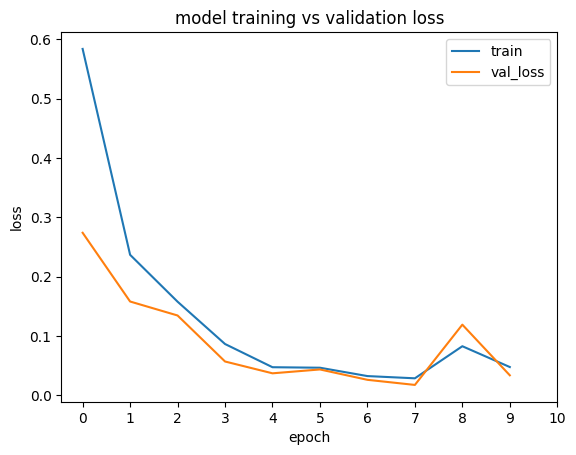

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model training vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(0, len(history.history['accuracy'])+1, 1))
plt.legend(['train','val_loss'])
plt.show()

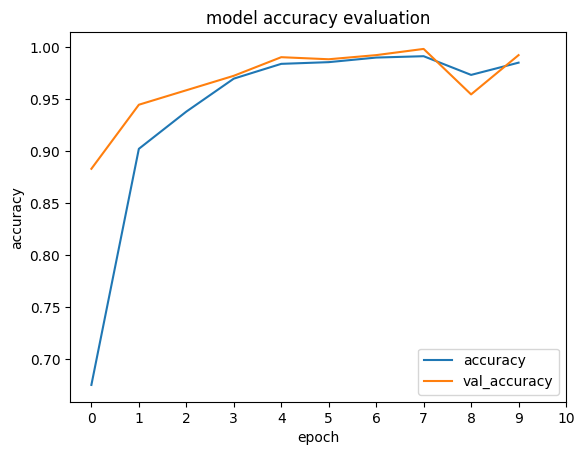

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy evaluation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(0, len(history.history['accuracy'])+1, 1))
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [17]:
model.evaluate(data_test)

23/23 [==============================] - 9s 391ms/step - loss: 0.0501 - accuracy: 0.9748


[0.05009560286998749, 0.9748252034187317]

In [18]:
model.save('model.h5')

In [19]:
# model.save('model')
# loaded_model = tf.keras.models.load_model('model')